Text(0, 0.5, 'Efficiency')

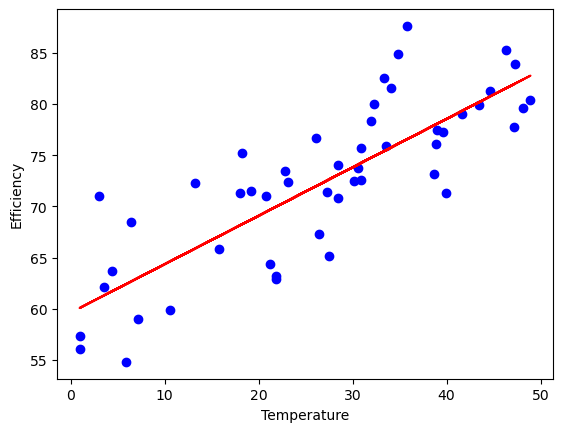

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

df = pd.read_csv("solar_efficiency_temp (1).csv")
x=df["temperature"].values.reshape(-1,1)
y=df["efficiency"]
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=3)


model  = LinearRegression()
model.fit(X_train,y_train)
model.predict(X_test)

plt.scatter(df["temperature"],df["efficiency"],color='blue',label="Actual Data")
plt.plot(X_train,model.predict(X_train),color='red',label="Predicted Values")
plt.xlabel("Temperature")
plt.ylabel("Efficiency")


In [15]:
import statsmodels.api as sm
X = sm.add_constant(df[['temperature']])
Y = df['efficiency']
model = sm.OLS(Y,X).fit()

# t-test
t_statistic = model.tvalues['temperature']
pvalue_t = model.pvalues['temperature']
# f-test
f_statistic = model.fvalue
pvalue_f = model.f_pvalue

print(f"F-statistic = {f_statistic}\nt-statistic = {t_statistic}")

if pvalue_f < 0.05:
    print("The regression coefficient for temperature is statistically significant.")
else:
    print("The regression coefficient for temperature is NOT statistically significant.")

if pvalue_t < 0.05:
    print("The temperature significantly predicts the efficiency of solar panels.")
else:
    print("The temperature does NOT significantly predicts the efficiency of solar panels.")

F-statistic = 91.58938851225089
t-statistic = 9.570234506648786
The regression coefficient for temperature is statistically significant.
The temperature significantly predicts the efficiency of solar panels.
